# Model Evaluation Exercise

## Regression evaluation

In [117]:
import numpy
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge

In [118]:

X,y = make_regression(n_features=10, n_samples=1000, noise=10,random_state=None)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [119]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [120]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

In [121]:
y

array([ 7.24766830e+01,  2.03006964e+02,  3.79922579e+01,  1.19466555e+01,
       -4.40938461e+01, -1.12337654e+02, -3.09329722e+02, -1.99208269e+02,
        8.73989979e+01,  1.28928407e+02, -1.87610476e+02,  1.44731780e+02,
       -7.10529994e+01, -2.86669066e+02,  7.73480008e+01, -4.93946510e+01,
        3.05080174e+01, -2.80235670e+02,  1.41404833e+02, -3.02359933e+02,
        6.27688853e+01, -7.70508324e+01, -1.99884353e+02,  3.10678176e+02,
       -1.10599794e+02,  1.99389454e+02,  3.48929271e+02,  1.50464768e+02,
       -1.50676854e+02,  1.35212578e+02, -1.43265554e+02, -7.13482550e+01,
        2.92685393e+02,  1.37541416e+02,  1.87120164e+01, -9.07614204e+01,
       -1.51096749e+02, -2.81099402e+00,  2.54036018e+02, -5.29075658e+01,
       -4.56666708e+01,  1.01617155e+02,  8.29657262e+01,  4.81583500e+02,
        1.02559625e+02,  2.34096592e+02,  3.37038280e+02, -2.33847434e+02,
        5.75081888e+01,  6.81861594e+01, -4.24175233e+02,  1.86805055e+02,
        3.80655035e+02,  

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers to....*

absolute magnitude of difference between the predicted value and actual value

* import **mean_absolute_error** from sklearn

In [122]:
from sklearn.metrics import mean_absolute_error

* compute MAE

In [123]:
mae_lr = mean_absolute_error(y, y_lr)
mae_rr = mean_absolute_error(y, y_rr)


* According to MAE, what is the better model?

In [124]:
print('Linear regression MAE: ',mae_lr)
print('Ridge regression MAE: ',mae_rr)
if mae_lr > mae_rr:
    print('Linear regression is better.')
else:
    print('Ridge regression is better.')

Linear regression MAE:  7.903889175364613
Ridge regression MAE:  7.904216195090476
Ridge regression is better.


____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers too....*

1 minus the ratio of mean squared error of the model vs. mean squared error of if just using the sample mean.

* import **r2_score** from sklearn

In [125]:
from sklearn.metrics import r2_score

* compute R2

In [126]:
r2_lr = r2_score(y,y_lr)
r2_rr = r2_score(y,y_rr)

* According to R2, what is the better model?

In [127]:
print('Linear regression R2: ',r2_lr)
print('Ridge regression R2: ',r2_rr)
if r2_lr > r2_rr:
    print('Linear regression is better.')
else:
    print('Ridge regression is better.')

Linear regression R2:  0.9970271366694132
Ridge regression R2:  0.9970271260212545
Linear regression is better.


In [128]:
# compare R2 outputs from with `.score()` method

print(lr.score(X,y))
print(rr.score(X,y))

0.9970271366694132
0.9970271260212545


* (Stretch) use predictions from linear regression and compute adjusted R2

In [129]:
def compare_models(lr_evaluation, rr_evaluation):

    if lr_evaluation > rr_evaluation:
        print('Linear regression is better.')
    else:
        print('Ridge regression is better.')
    lr_evaluation = f'{lr_evaluation=}'
    rr_evaluation = f'{rr_evaluation=}'
    print(lr_evaluation)
    print(rr_evaluation)


In [130]:
# Resource: https://www.statology.org/adjusted-r-squared-in-python/
#display adjusted R-squared

def r2a(X,y):
    # Perform linear regression
    lr = LinearRegression()
    lr.fit(X,y)

    # Perform ridge regression
    rr = Ridge(alpha=0.1)
    rr.fit(X,y)

    # Obtain r^2 values for each model
    r2a_lr = 1 - (1-lr.score(X,y))* (len(y)-1)/(len(y)-X.shape[1]-1)
    r2a_rr = 1 - (1-rr.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    # 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    compare_models(r2a_lr, r2a_rr)


r2a(X,y)

Linear regression is better.
lr_evaluation=0.9969970773839675
rr_evaluation=0.9969970666281428


In [98]:
# Try doing this with Jess's method

def r2a_b(X,y):
    n = len(X)
    p = len(X[0,:])
    # Perform linear regression
    lr = LinearRegression()
    lr.fit(X,y)

    # Perform ridge regression
    rr = Ridge(alpha=0.1)
    rr.fit(X,y)

    # Obtain r^2 values for each model
    r2a_lr = 1 - (1-lr.score(X,y))* (n-1)/(n-p-1)
    r2a_rr = 1 - (1-rr.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    # 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    compare_models(r2a_lr, r2a_rr)


r2a_b(X,y)

Linear regression is better.
lr_evaluation=0.6273468235367892
rr_evaluation=0.6273468231020518


________________________________
## Classification evaluation

In [99]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, RidgeClassifier

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2,random_state=1)

print(X.shape)
print(y.shape)

# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

(1000, 10)
(1000,)


## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers too....*

Number of true positives divided by number of total identified positives (false + true positives)

* import **precision_score** from sklearn

In [100]:
from sklearn.metrics import precision_score

* compute precision

In [101]:
precision_lr = precision_score(y, y_lr)
precision_rr = precision_score(y, y_rr)

* print precision

In [102]:
compare_models(precision_lr, precision_rr)

Linear regression is better.
lr_evaluation=0.8362573099415205
rr_evaluation=0.8301526717557252


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers too....*

True positives divided by all actual positives.

* import **recal_score** from sklearn

In [103]:
from sklearn.metrics import recall_score

* compute recall

In [104]:
recall_lr = recall_score(y, y_lr)
recall_rr = recall_score(y, y_rr)

* print recall

In [105]:
compare_models(recall_lr, recall_rr)

Ridge regression is better.
lr_evaluation=0.8701825557809331
rr_evaluation=0.8823529411764706


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers too....*

Receiver operator characteristic. Plot of false positive rate on x-axis vs. true positive rate on y-axis. Perfect score is area under curve of 1.

* import **roc_curve** from sklearn

In [106]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [107]:
print(y_lr[0:10])
print(y_rr[0:10])
print(y[0:10])

[0 1 1 1 1 1 1 1 0 0]
[0 1 1 1 1 1 1 1 0 0]
[0 0 1 1 1 1 1 1 0 0]


* import matplotlib 

In [108]:
lr.predict_proba(X)

array([[0.93727372, 0.06272628],
       [0.46053943, 0.53946057],
       [0.00106194, 0.99893806],
       ...,
       [0.99829099, 0.00170901],
       [0.58156086, 0.41843914],
       [0.99561942, 0.00438058]])

In [109]:
print(rr.decision_function(X).shape)
rr.decision_function(X)

(1000,)


array([-7.06316169e-01,  9.92610683e-02,  1.70723066e+00,  4.80800652e-01,
        1.21286497e+00,  4.32496594e-01,  3.85137096e-01,  3.68860952e-01,
       -3.31655424e-01, -7.70288666e-01,  1.81643638e-01,  5.61746930e-01,
       -1.20684376e+00,  2.31622156e-01,  4.03604287e-01,  4.55616519e-01,
        3.61831007e-01, -1.90623609e+00, -1.38256760e-01,  7.25925782e-01,
        1.60067578e-01,  6.49972223e-01,  2.15548344e-01, -2.02047859e-01,
        1.08103436e-01,  3.55440129e-01,  4.88558482e-01, -6.39713207e-01,
        1.12877834e+00,  2.00205105e-01, -9.79028013e-01,  8.66388431e-01,
        1.68415184e+00,  8.54301338e-02,  1.14987614e+00,  1.59940561e-01,
       -4.50638322e-01,  1.79847505e-01,  5.95717770e-01, -5.78852344e-01,
        1.14502946e+00, -6.44773782e-01,  6.86567763e-01, -8.82779585e-01,
       -1.76078033e-01,  1.55647786e-01, -1.40842033e-01,  6.06310037e-01,
       -3.25308293e-01, -2.12931541e-01, -8.80359840e-01,  8.78250685e-01,
       -4.53164823e-01, -

In [110]:
roc_lr = roc_auc_score(y, lr.predict_proba(X)[:, 1])
roc_rr = roc_auc_score(y, rr.decision_function(X))
compare_models(roc_lr, roc_rr)

Linear regression is better.
lr_evaluation=0.9210725302159223
rr_evaluation=0.9195322283167502


* plot ROC

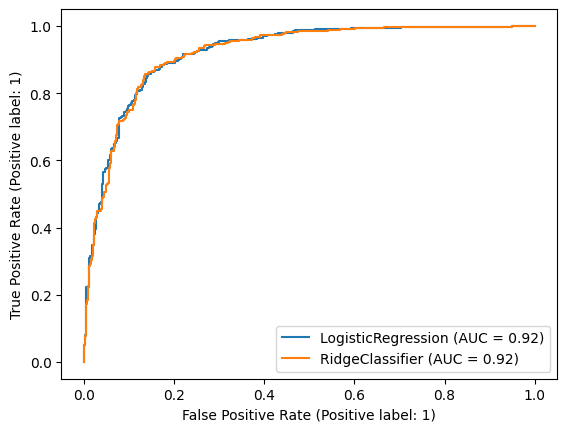

In [111]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(lr, X, y, ax=ax)
RocCurveDisplay.from_estimator(rr, X, y, ax=ax)

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...*

negative log-likelihood of a logistic model 

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html?highlight=log_loss#sklearn.metrics.log_loss)

* import **log_loss** from sklearn

In [112]:
from sklearn.metrics import log_loss

* compute log_loss

* print log_loss

In [113]:
lr.predict_proba(X).shape

(1000, 2)

In [114]:
ll_lr = log_loss(y, lr.predict_proba(X)) # Use all columns in lr.predict_proba(X)
ll_rr = roc_auc_score(y, rr.decision_function(X))
compare_models(ll_lr, ll_rr)

Ridge regression is better.
lr_evaluation=0.3579562858070378
rr_evaluation=0.9195322283167502


In [115]:
ll_lr = log_loss(y, lr.predict_proba(X)[:,1]) # Use only one column in lr.predict_proba(X)
ll_rr = roc_auc_score(y, rr.decision_function(X))
compare_models(ll_lr, ll_rr)

Ridge regression is better.
lr_evaluation=0.3579562858070378
rr_evaluation=0.9195322283167502


#### Q: According to metrics above, which one is the better model?